## Exploring Fluorescence Microscopy Segmentation Data

The dataset is sourced from the [cell tracking challenge](http://celltrackingchallenge.net/) website. I'm using a 3D+t fluorescence microscopy dataset of the developing C. elegans embryo with segmentation maps - [link](http://celltrackingchallenge.net/3d-datasets/)

## Download and Extract Data:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#!wget https://data.celltrackingchallenge.net/training-datasets/Fluo-N3DH-CE.zip
!rsync -a /content/drive/MyDrive/mydata/Fluo-N3DH-CE.zip  /content/

In [ ]:
!unzip /content/Fluo-N3DH-CE.zip

## Install SimpleITK 
This library is useful for handling `.tif` files

In [6]:
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 89kB/s 


In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import SimpleITK as sitk
import plotly.express as px
import plotly.graph_objects as go

## Define `load_img_from_tiff`
Loads images from a `.tif` file and returns a numpy ndarray containing image(s) from the tiff file.

In [8]:
def load_img_from_tiff(path2img):
    img = sitk.ReadImage(path2img)
    img_array = sitk.GetArrayFromImage(img)
    return(img_array)

## Define `display_images`


In [9]:
def display_images(images, columns=5, width=20, height=3, max_images=40, label_wrap_length=5, label_font_size=8):

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))

    for i, image in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image, cmap='inferno')

## Plot images:
The grid below contains images from one `.tif` file. Every 2D image represents a slice of the raw 3D data.

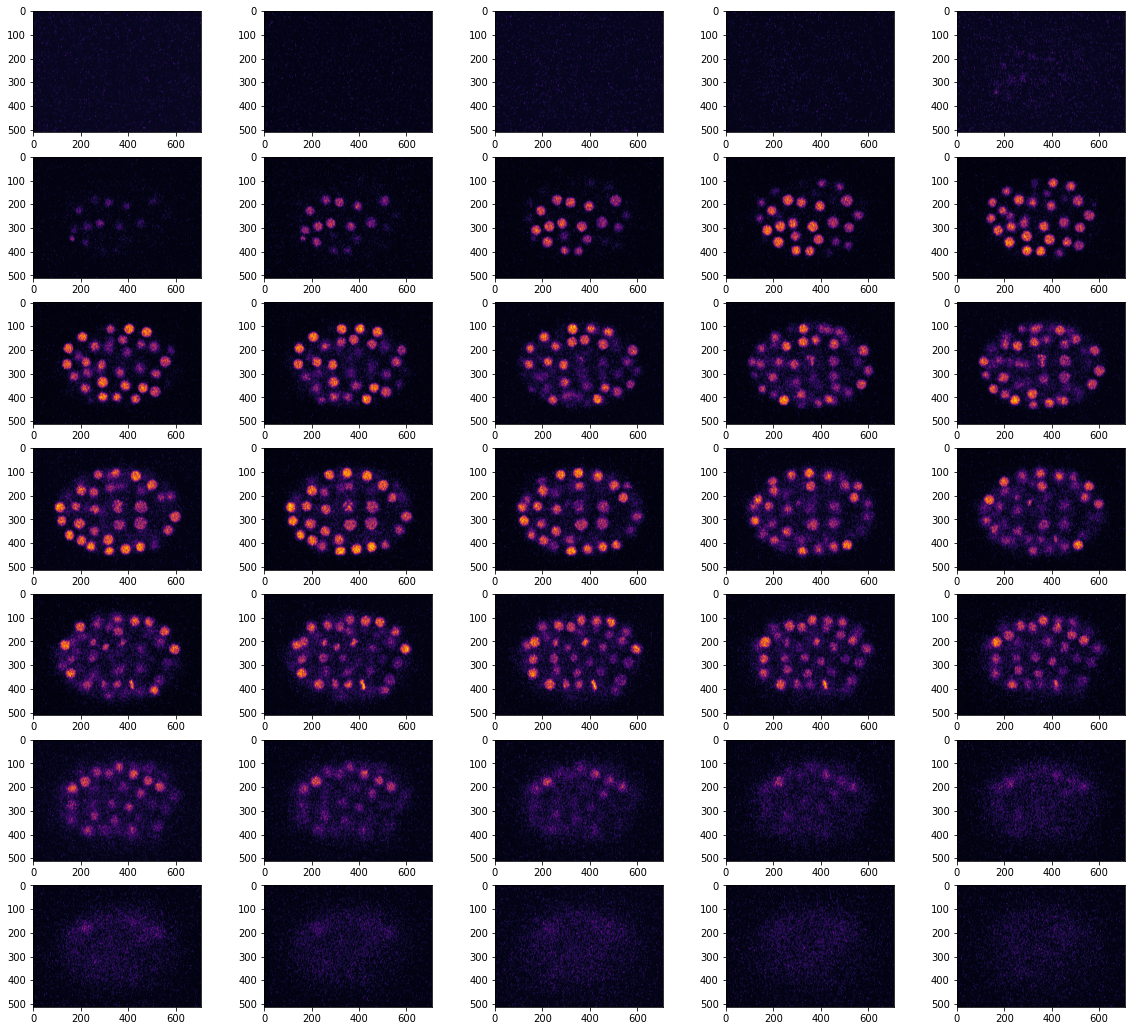

In [10]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE/01/t100.tif")
display_images(arr_images)

## Plot Corresponding Segmentation Maps:
The grid below contains segmentation maps which correspond to the images above. These are stored in a seperate `.tif` file

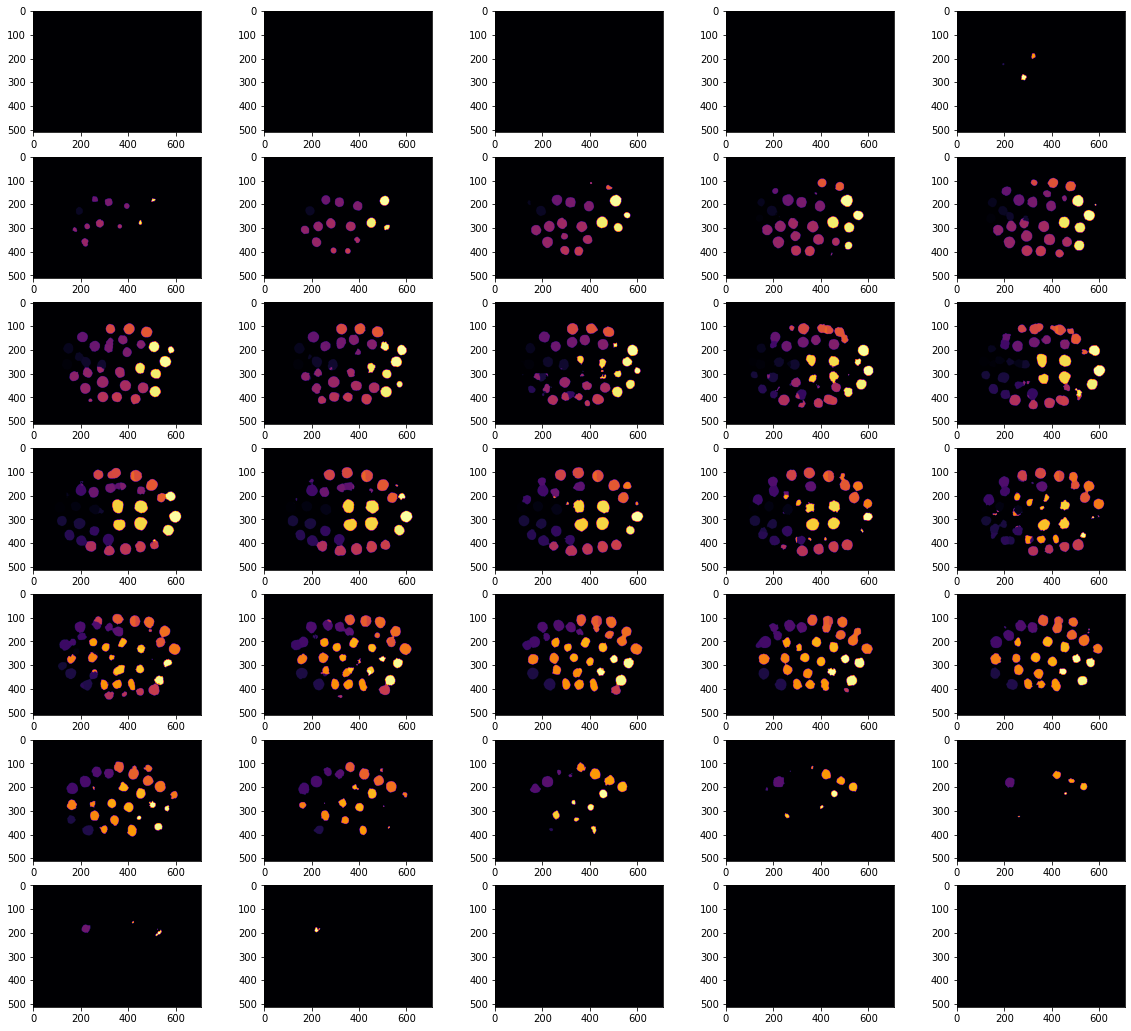

In [11]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE/01_ST/SEG/man_seg100.tif")
display_images(arr_images)

## Convert `.tif` files into `.jpeg` and `.png`



In [ ]:
!mkdir features
!mkdir segmentation_maps
!mkdir features_jpeg
!mkdir segmentation_maps_jpeg

In [54]:
from tqdm import tqdm

for t in tqdm(range(194)):
  t3 = f"{t:03}"
  feature_path="/content/Fluo-N3DH-CE/01/t"+str(t3)+".tif"
  seg_map_path="/content/Fluo-N3DH-CE/01_ST/SEG/man_seg"+str(t3)+".tif"
  features_arr = load_img_from_tiff(feature_path)
  seg_arr = load_img_from_tiff(seg_map_path)
  
  for i in range(len(features_arr)):
    cv2.imwrite('/content/features_jpeg/F'+str(t)+'_'+str(i)+'.jpeg', features_arr[i])
    cv2.imwrite('/content/segmentation_maps_jpeg/L'+str(t)+'_'+str(i)+'.jpeg', seg_arr[i])
    cv2.imwrite('/content/features/F'+str(t)+'_'+str(i)+'.png', features_arr[i])
    cv2.imwrite('/content/segmentation_maps/L'+str(t)+'_'+str(i)+'.png', seg_arr[i])

100%|██████████| 194/194 [01:31<00:00,  2.12it/s]


In [55]:
features_path, label_path, features_path_jpeg, label_path_jpeg = "/content/features/", "/content/segmentation_maps/", "/content/features_jpeg/", "/content/segmentation_maps_jpeg/"

## Resize images:

In [58]:
from PIL import Image
import os, sys

def resize(path, mode):
  dirs = os.listdir( path )
  for item in tqdm(dirs):
    if os.path.isfile(path+item):
      im = Image.open(path+item)
      f, e = os.path.splitext(path+item)
      imResize = im.resize((256,256), Image.NEAREST)
      imResize.save(f+e, mode, quality=100)
      
resize(features_path, mode='PNG')
resize(label_path, mode='PNG')
resize(features_path_jpeg, mode='JPEG')
resize(label_path_jpeg, mode='JPEG')


100%|██████████| 6790/6790 [00:10<00:00, 625.09it/s]


## Plot images in 3D to analyze compression loss:

In [82]:
z = plt.imread("/content/segmentation_maps/L150_25.png")
fig = go.Figure(data=[go.Surface(z=z)])
fig.update_layout(title='PNG', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [80]:
z=plt.imread("/content/segmentation_maps_jpeg/L150_25.jpeg")
fig = go.Figure(data=[go.Surface(z=z)])
fig.update_layout(title='JPEG format', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

## Copy data to Google Drive


In [87]:
!cp -r /content/features /content/drive/MyDrive/mydata/celltrackingchallenge/
!cp -r /content/segmentation_maps /content/drive/MyDrive/mydata/celltrackingchallenge/